In [25]:
import pandas as pd
import seaborn as sns
from random import random
from tqdm.notebook import tqdm
import altair as alt

In [59]:
# simulate random outcome for experiment

conversion_rate = 0.2
n_samples = 100

res = []

for i in range(n_samples):
  res.append(random())
  df = pd.DataFrame()
  df['random_event'] = pd.Series(res)
  df['conv'] = (df['random_event']>(1-conversion_rate)).astype(int)
  df = df.sort_values('conv')
  df['converted'] = df['conv'].map({1:'Yes', 0:'No'})

print(f'mean: {df.conv.mean():0.2f} (n={len(df.conv)})')

scatter = alt.Chart(df.reset_index()).mark_circle(size=60).encode(
    x=alt.X('converted'),
    y=alt.Y('random_event')
)

hist = alt.Chart(df).mark_bar(size=40).encode(
    alt.X('count()'),
    alt.Y("conv")
)

scatter | hist

mean: 0.17 (n=100)


alt.HConcatChart(...)

Experiement failure: 2/100


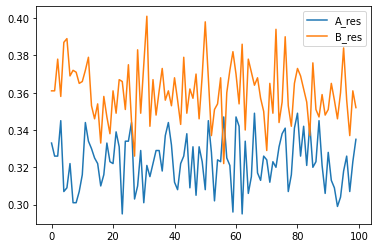

In [ ]:
# simulate outcome for A vs. B experiment

a_conversion = 0.32
b_conversion = 0.36

n_samples = 1000
n_experiments = 100

res_a, res_b = [], []

for i in range(n_experiments):
    A = [random() for x in range(n_samples)]
    B = [random() for x in range(n_samples)]
    df = pd.DataFrame()
    df['A'] = pd.Series(A)
    df['A_conv'] = (df['A']>(1-a_conversion)).astype(int)
    df['B'] = pd.Series(B)
    df['B_conv'] = (df['B']>(1-b_conversion)).astype(int)
    res_a.append(df.A_conv.mean())
    res_b.append(df.B_conv.mean())

dx = pd.DataFrame()
dx[f'A_res'] = pd.Series(res_a)
dx[f'B_res'] = pd.Series(res_b)

dx.plot()
print(f"Experiement failure: {dx[dx['B_res'] < dx['A_res']].shape[0]}/{n_experiments}")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


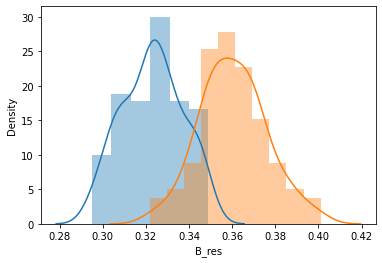

In [ ]:
sns.distplot(dx['A_res'])
sns.distplot(dx['B_res'])

Verifies at https://abtestguide.com/calc/

#### Bayesian A/B-test Calculator
What is the probability that your test variation beats the original? Make a solid risk assessment whether to implement the variation or not.


Given that we observe
	A conversion = 0.32
	B conversion = 0.36
		with n=1000 samples each


Average over 20 simulations

	Chance of A outperforming B: 2.65 % (false positives)



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


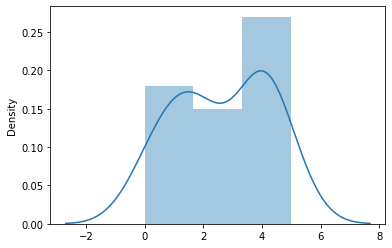

In [ ]:
# Simulate outcomes to find false positive rate
simulations = 20
n_samples = 1000

x = []

for i in tqdm(range(simulations)):
    res_a, res_b = [], []
    for i in range(n_experiments):
        A = [random() for x in range(n_samples)]
        B = [random() for x in range(n_samples)]
        df = pd.DataFrame()
        df['A'] = pd.Series(A)
        df['A_conv'] = (df['A']>(1-a_conversion)).astype(int)
        df['B'] = pd.Series(B)
        df['B_conv'] = (df['B']>(1-b_conversion)).astype(int)
        res_a.append(df.A_conv.mean())
        res_b.append(df.B_conv.mean())

    dx = pd.DataFrame()
    dx[f'A_res'] = pd.Series(res_a)
    dx[f'B_res'] = pd.Series(res_b)
    x.append(dx[dx['B_res'] < dx['A_res']].shape[0])

res = pd.Series(x)
print(f'Given that we observe\n\tA conversion = {a_conversion}\n\tB conversion = {b_conversion}')
print(f'\t\twith n={n_samples} samples each\n')
print(f'\nAverage over {simulations} simulations\n')
print('\tChance of A outperforming B:', res.mean(), '%', '(false positives)\n')

sns.distplot(res)

Output can be verified here https://abtestguide.com/bayesian/